# Business Case 

### All the factors that could influence residential home prices across the United States over the next decade And how.

#### There are two categories we will have divided that can play vital role US residential home prices:-
   1. Demand
   2. Supply

We have two datasets, that is Demand Dataset and Supply Dataset. We gather dataset from Kaggle.

# Import Dependencies

In [1]:
import os
import sys
import warnings
import pandas
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline

# Load Datasets

In [2]:
demand = pd.read_csv("demand_data.csv")

# EDA(Exploratory Data Analysis)

In [3]:
demand.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48


In [4]:
demand.tail()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
79,2019-10-01,3.60,3.70,19202.310,2.34,212.47
80,2020-01-01,3.80,3.52,18951.992,2.36,215.51
81,2020-04-01,13.07,3.24,17258.205,2.55,217.89
82,2020-07-01,8.80,2.95,18560.774,2.80,222.84
83,2020-10-01,6.77,2.76,18767.778,2.74,232.55


In [5]:
supply = pd.read_csv("supply_data.csv")

In [6]:
supply.head()

,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,1,01-01-2000,1727,353065,873,1636
1,2,01-02-2000,1692,351933,856,1737
2,3,01-03-2000,1651,353452,900,1604
3,4,01-04-2000,1597,356188,841,1626
4,5,01-05-2000,1543,349907,857,1575


In [7]:
supply.tail()

,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
245,246,01-06-2020,1258,553721,840,1265
246,247,01-07-2020,1483,575451,979,1487
247,248,01-08-2020,1476,615396,977,1373
248,249,01-09-2020,1545,619090,965,1437
249,250,01-10-2020,1544,637138,945,1528


In [8]:
supply.drop("Unnamed: 0", axis =1,inplace=True)

In [9]:
supply.head()

,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,01-01-2000,1727,353065,873,1636
1,01-02-2000,1692,351933,856,1737
2,01-03-2000,1651,353452,900,1604
3,01-04-2000,1597,356188,841,1626
4,01-05-2000,1543,349907,857,1575


In [10]:
supply.tail()

,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
245,01-06-2020,1258,553721,840,1265
246,01-07-2020,1483,575451,979,1487
247,01-08-2020,1476,615396,977,1373
248,01-09-2020,1545,619090,965,1437
249,01-10-2020,1544,637138,945,1528


# Adding both Demand dataset and Supply dataset together

In [11]:
us_house_price = pd.concat([demand,supply],axis=1,join='inner')

In [12]:
us_house_price.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34,01-01-2000,1727,353065,873,1636
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67,01-02-2000,1692,351933,856,1737
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79,01-03-2000,1651,353452,900,1604
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27,01-04-2000,1597,356188,841,1626
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48,01-05-2000,1543,349907,857,1575


In [13]:
us_house_price.tail()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
79,2019-10-01,3.60,3.70,19202.310,2.34,212.47,01-08-2006,1722,584460,1035,1650
80,2020-01-01,3.80,3.52,18951.992,2.36,215.51,01-09-2006,1655,573878,1016,1720
81,2020-04-01,13.07,3.24,17258.205,2.55,217.89,01-10-2006,1570,561444,941,1491
82,2020-07-01,8.80,2.95,18560.774,2.80,222.84,01-11-2006,1535,548971,1003,1570
83,2020-10-01,6.77,2.76,18767.778,2.74,232.55,01-12-2006,1638,545011,998,1649


## Renaming some of Labels after adding both datasets

In [14]:
us_house_price.rename(columns={'Period':'PERIOD','Permit_Number':'PERMIT_NUMBER','construction':'CONSTRUCTION','Homes_Sold':'HOMES_SOLD','Housing_Starts':'HOUSING_STARTS'},inplace = True)

In [15]:
us_house_price.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,PERIOD,PERMIT_NUMBER,CONSTRUCTION,HOMES_SOLD,HOUSING_STARTS
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34,01-01-2000,1727,353065,873,1636
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67,01-02-2000,1692,351933,856,1737
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79,01-03-2000,1651,353452,900,1604
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27,01-04-2000,1597,356188,841,1626
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48,01-05-2000,1543,349907,857,1575


In [16]:
us_house_price.tail()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,PERIOD,PERMIT_NUMBER,CONSTRUCTION,HOMES_SOLD,HOUSING_STARTS
79,2019-10-01,3.60,3.70,19202.310,2.34,212.47,01-08-2006,1722,584460,1035,1650
80,2020-01-01,3.80,3.52,18951.992,2.36,215.51,01-09-2006,1655,573878,1016,1720
81,2020-04-01,13.07,3.24,17258.205,2.55,217.89,01-10-2006,1570,561444,941,1491
82,2020-07-01,8.80,2.95,18560.774,2.80,222.84,01-11-2006,1535,548971,1003,1570
83,2020-10-01,6.77,2.76,18767.778,2.74,232.55,01-12-2006,1638,545011,998,1649


In [17]:
us_house_price.columns

Index(['DATE', 'UNEM_RATE', 'MORTGAGE', 'GDPC1', 'FORECLOSURES', 'HPI',
       'PERIOD', 'PERMIT_NUMBER', 'CONSTRUCTION', 'HOMES_SOLD',
       'HOUSING_STARTS'],
      dtype='object')

### At a glance of all Attributes/Features in whole dataset

#### We have 11 Features in our dataset.
  ##### Let's talk about all features seperately

##### HPI - HOUSE PRICE INDEX - It is indicator that gives an idea how much price has changed(Target Feature) or say 'y'
##### MORTGAGE - The rate of interest charged by a mortgage lender.
##### PERMIT_NUMBER - Number of building permits allotted.
##### FORECLOSURES - A foreclosure charge, or prepayment penalty, is the extra amount that lenders charge you for closing the loan before the tenure is over.
##### HOMES_SOLD - House for sale is a basic measure of supply.
##### HOUSING_STARTS - This is a measure of the number of units of new housing projects started in a given period.
##### CONSTRUCTION - The amount spent (in millions of USD) is a measure of the activity in the construction industry.
##### GDPC1 - USA GDP(Billions dallors) - Quaterly Real GDP(Adjusted for Inflation)
##### UNEM_RATE - It is percentage of people who is unemployed
##### DATE - Date in Quaterly 
##### PERIOD - Time in Monthly

In [18]:
us_house_price.shape

(84, 11)

In [19]:
us_house_price.isnull().sum()

DATE              0
UNEM_RATE         0
MORTGAGE          0
GDPC1             0
FORECLOSURES      0
HPI               0
PERIOD            0
PERMIT_NUMBER     0
CONSTRUCTION      0
HOMES_SOLD        0
HOUSING_STARTS    0
dtype: int64

In [20]:
us_house_price.duplicated().sum()

0

In [21]:
us_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            84 non-null     object 
 1   UNEM_RATE       84 non-null     float64
 2   MORTGAGE        84 non-null     float64
 3   GDPC1           84 non-null     float64
 4   FORECLOSURES    84 non-null     float64
 5   HPI             84 non-null     float64
 6   PERIOD          84 non-null     object 
 7   PERMIT_NUMBER   84 non-null     int64  
 8   CONSTRUCTION    84 non-null     int64  
 9   HOMES_SOLD      84 non-null     int64  
 10  HOUSING_STARTS  84 non-null     int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 7.3+ KB


In [22]:
us_house_price.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UNEM_RATE,84.0,5.986667,1.976243,3.600,4.55250,5.4300,7.00500,13.07
MORTGAGE,84.0,5.092381,1.324841,2.760,3.94250,4.8850,6.13500,8.32
GDPC1,84.0,15968.048810,1762.701831,12935.252,14821.74175,15768.5285,17394.92625,19202.31
FORECLOSURES,84.0,4.745119,3.290622,1.410,2.09750,3.1600,7.51750,11.54
HPI,84.0,161.669405,30.778158,101.340,140.49500,162.2400,182.94500,232.55
PERMIT_NUMBER,84.0,1847.750000,218.735571,1535.000,1658.25000,1803.0000,2063.00000,2263.00
CONSTRUCTION,84.0,473967.202381,110392.854332,337374.000,370467.75000,439923.0000,568182.50000,678562.00
HOMES_SOLD,84.0,1054.773810,149.515712,793.000,935.25000,1020.0000,1179.25000,1389.00
HOUSING_STARTS,84.0,1796.119048,205.931115,1463.000,1625.75000,1758.5000,1984.25000,2273.00


In [23]:
us_house_price.corr()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,PERMIT_NUMBER,CONSTRUCTION,HOMES_SOLD,HOUSING_STARTS
UNEM_RATE,1.000000,-0.328381,-0.079811,0.734548,-0.201833,0.035491,-0.097199,0.154057,0.014711
MORTGAGE,-0.328381,1.000000,-0.832314,-0.476823,-0.590082,-0.652482,-0.814635,-0.756566,-0.624184
GDPC1,-0.079811,-0.832314,1.000000,0.172545,0.854121,0.647289,0.933142,0.669057,0.628408
FORECLOSURES,0.734548,-0.476823,0.172545,1.000000,-0.197201,0.523666,0.222247,0.567418,0.491675
HPI,-0.201833,-0.590082,0.854121,-0.197201,1.000000,0.293107,0.678345,0.320312,0.288967
PERMIT_NUMBER,0.035491,-0.652482,0.647289,0.523666,0.293107,1.000000,0.800877,0.906032,0.935595
CONSTRUCTION,-0.097199,-0.814635,0.933142,0.222247,0.678345,0.800877,1.000000,0.776272,0.769007
HOMES_SOLD,0.154057,-0.756566,0.669057,0.567418,0.320312,0.906032,0.776272,1.000000,0.848946
HOUSING_STARTS,0.014711,-0.624184,0.628408,0.491675,0.288967,0.935595,0.769007,0.848946,1.000000


## Data Visualization

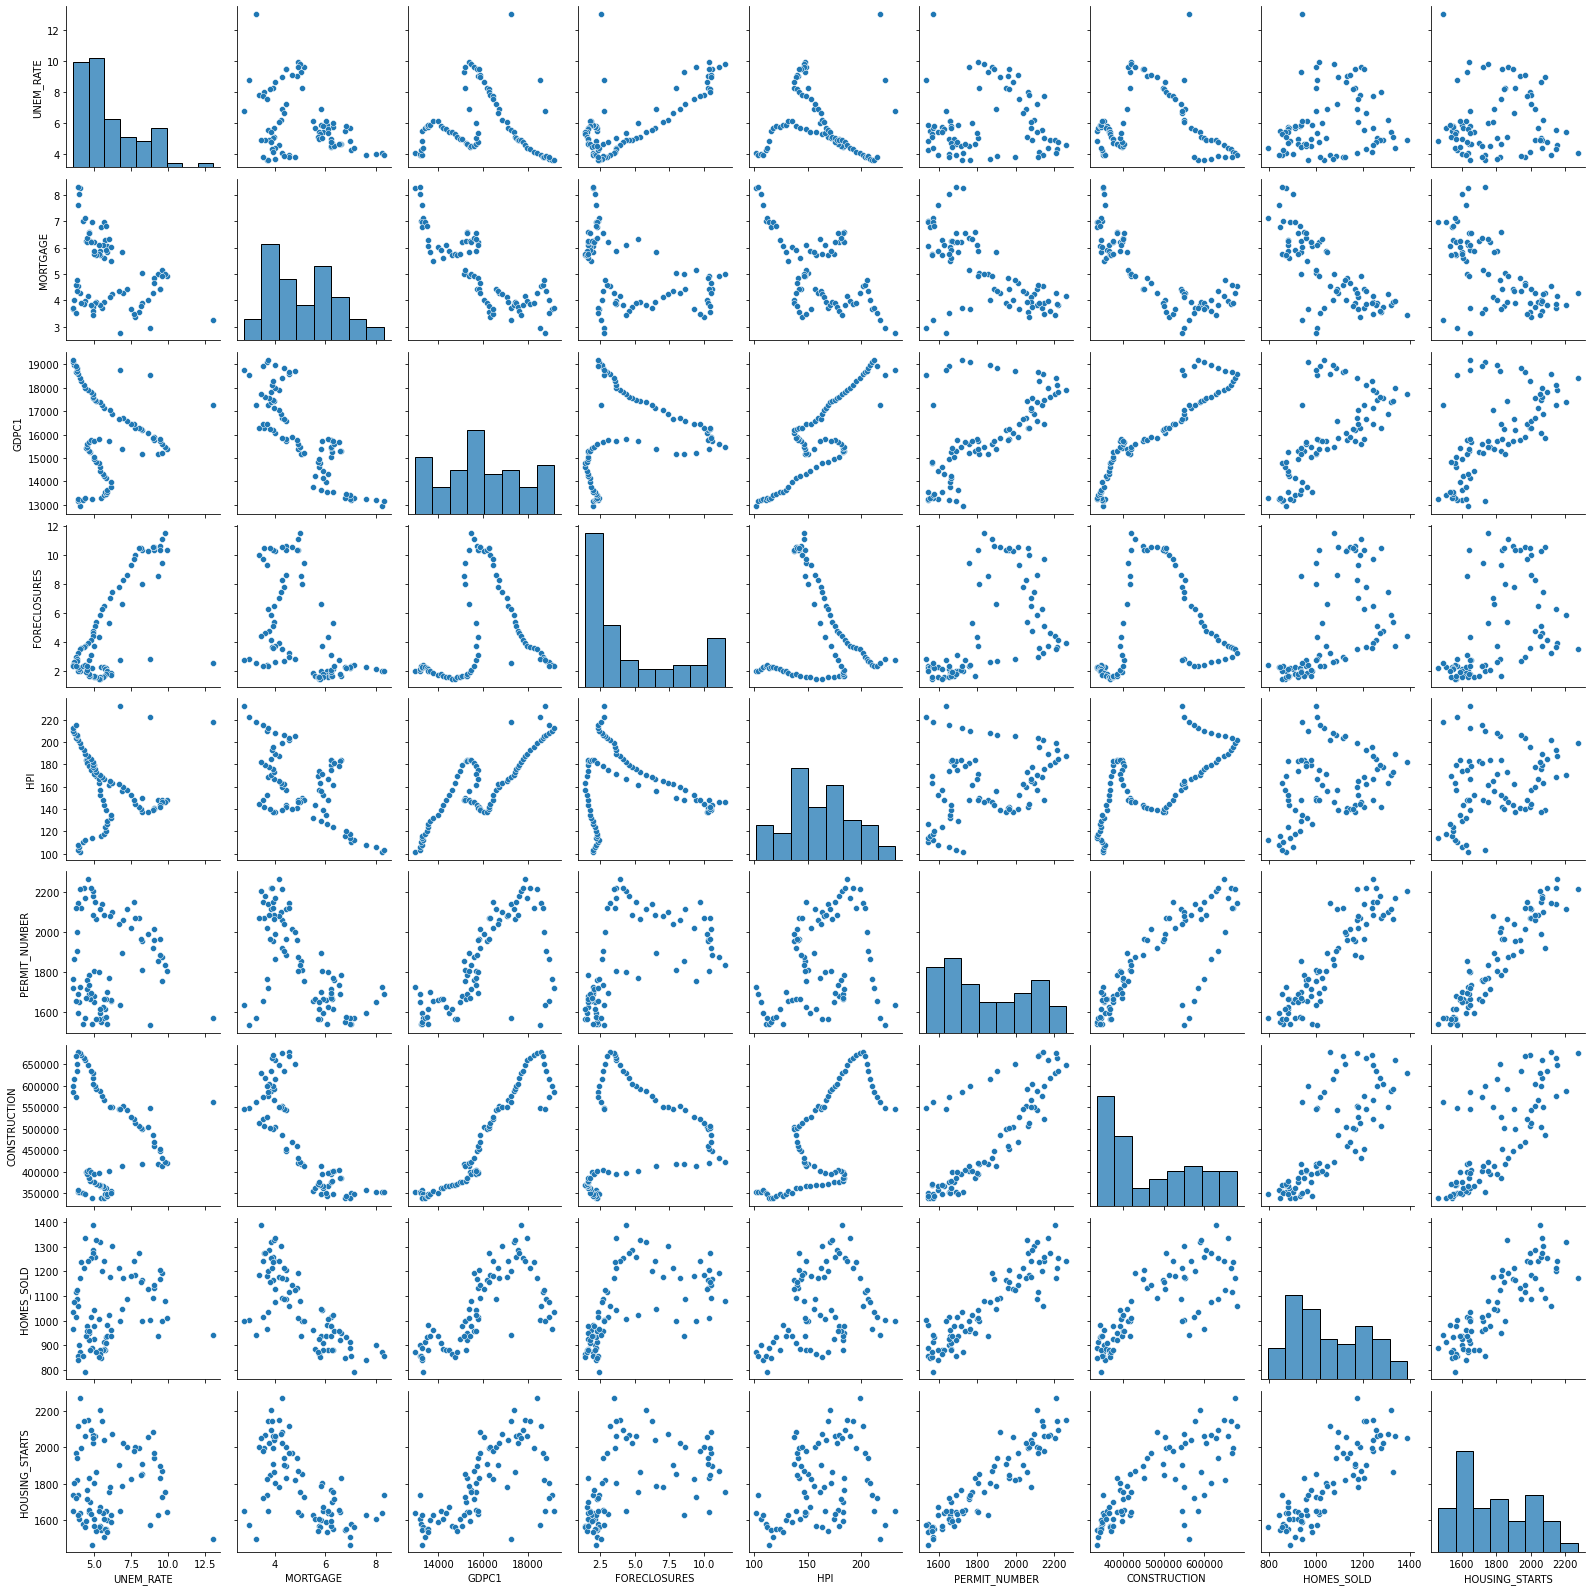

In [24]:
sns.pairplot(us_house_price)

### Observation:-

From above plot, it is clear that PERMIT_NUMBER,HOUSING_STARTS, HOUSES_SOLD, CONSTRUCTION are most relating features.

<AxesSubplot:>

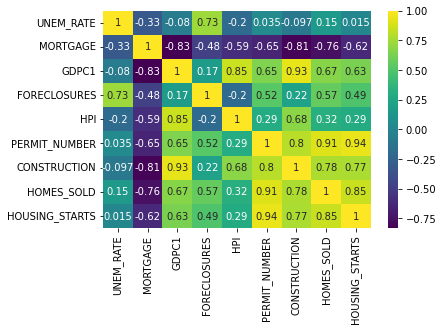

In [25]:
sns.heatmap(us_house_price.corr(),cmap = 'viridis',annot = True)

### Observation:-

From above plot, this is clear that HOUSING_STARTS, HOMES_SOLD, CONSTRUCTION AND PERMIT_NUMBER ARE HIGHLY co related features.

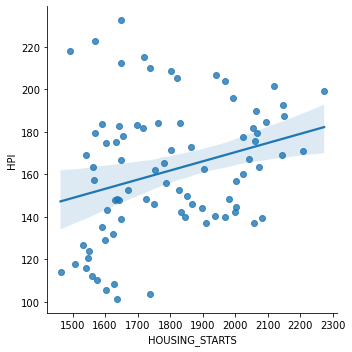

In [26]:
sns.lmplot(x = 'HOUSING_STARTS',y = 'HPI',data = us_house_price)

### Observation:-

1. From above plot, it is clear that only two  points between HOUSING_STARTS and HPI are align in same line along straight line, remaining other are not near straight line.
2. Ordinate's HPI Feature axis that is 160 and abscissa's HOUSING_STARTS Feature axis  that is 1750 that is  first point is near along straight line in above plot.
3. Ordinate's HPI Feature axis that is 177 and abscissa's HOUSING_STARTS Feature axis that is 2090 , which is second points near to straight line in the above plot. 
4. It means that HPI is influnced by HOSING_STARTS feature at some extent.

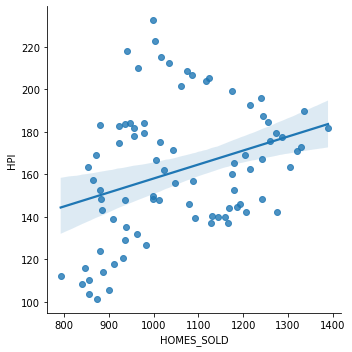

In [27]:
sns.lmplot(x = 'HOMES_SOLD',y = 'HPI',data = us_house_price)

### Observation:-

1. From above plot, it is very clear that HPI is much related to HOMES_SOLD.
2. At least 6 points are along and most near to straight line and it means HPI is influnced by HOMES_SOLD feature.

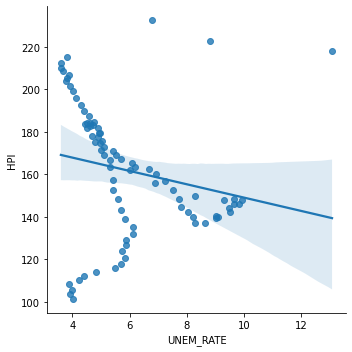

In [28]:
sns.lmplot(x = 'UNEM_RATE',y = 'HPI',data = us_house_price)

### Observation:-

1. From above plot, it is clear that value is negative. It means there is no influence of UNEM_RATE on HPI.

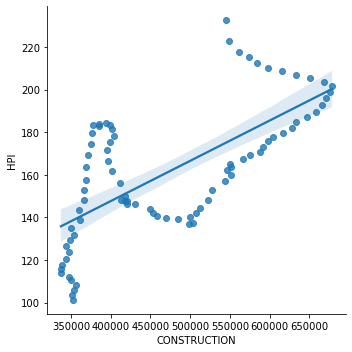

In [29]:
sns.lmplot(x = 'CONSTRUCTION',y = 'HPI',data = us_house_price)

### Observation:-

1. From above plot, it is clear that only there are three points which are along straight line, HPI is little bit influnced by CONSTRUCTION.

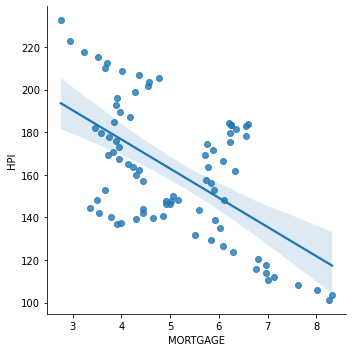

In [30]:
sns.lmplot(x = 'MORTGAGE',y = 'HPI',data = us_house_price)

### Observation:-

1. From above plot, it is clear that there is negative relation between HPI and MORTGAGE. MORTGAGE has no influence on HPI. 

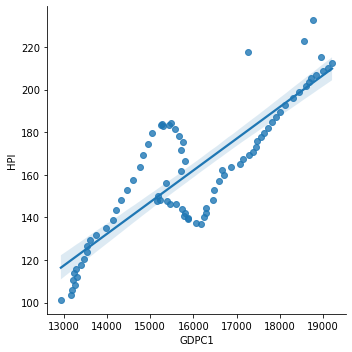

In [31]:
sns.lmplot(x = 'GDPC1',y = 'HPI',data = us_house_price)

### Observation:-

1. From above plot, it is clear that at least 9 points align straight line. HPI is influnced by GDPC1.

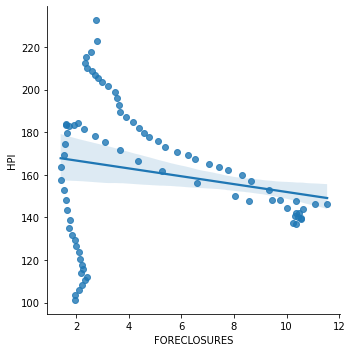

In [32]:
sns.lmplot(x = 'FORECLOSURES',y = 'HPI',data = us_house_price)

1. From above plot, it is clear that HPI has least influnce by FORECLOSURES.It shows that almost negative influnced. 

In [33]:
from datetime import datetime

In [34]:
us_house_price['DATE'] = pd.to_datetime(us_house_price['DATE'])

In [35]:
us_house_price['QUARTER'] = us_house_price['DATE'].dt.quarter

In [36]:
us_house_price.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,PERIOD,PERMIT_NUMBER,CONSTRUCTION,HOMES_SOLD,HOUSING_STARTS,QUARTER
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34,01-01-2000,1727,353065,873,1636,1
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67,01-02-2000,1692,351933,856,1737,2
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79,01-03-2000,1651,353452,900,1604,3
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27,01-04-2000,1597,356188,841,1626,4
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48,01-05-2000,1543,349907,857,1575,1


In [37]:
us_house_price.tail()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,PERIOD,PERMIT_NUMBER,CONSTRUCTION,HOMES_SOLD,HOUSING_STARTS,QUARTER
79,2019-10-01,3.60,3.70,19202.310,2.34,212.47,01-08-2006,1722,584460,1035,1650,4
80,2020-01-01,3.80,3.52,18951.992,2.36,215.51,01-09-2006,1655,573878,1016,1720,1
81,2020-04-01,13.07,3.24,17258.205,2.55,217.89,01-10-2006,1570,561444,941,1491,2
82,2020-07-01,8.80,2.95,18560.774,2.80,222.84,01-11-2006,1535,548971,1003,1570,3
83,2020-10-01,6.77,2.76,18767.778,2.74,232.55,01-12-2006,1638,545011,998,1649,4


In [38]:
us_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            84 non-null     datetime64[ns]
 1   UNEM_RATE       84 non-null     float64       
 2   MORTGAGE        84 non-null     float64       
 3   GDPC1           84 non-null     float64       
 4   FORECLOSURES    84 non-null     float64       
 5   HPI             84 non-null     float64       
 6   PERIOD          84 non-null     object        
 7   PERMIT_NUMBER   84 non-null     int64         
 8   CONSTRUCTION    84 non-null     int64         
 9   HOMES_SOLD      84 non-null     int64         
 10  HOUSING_STARTS  84 non-null     int64         
 11  QUARTER         84 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(5), object(1)
memory usage: 8.0+ KB


In [39]:
us_house_price.drop('DATE',axis =1,inplace=True)

In [40]:
us_house_price.head()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,PERIOD,PERMIT_NUMBER,CONSTRUCTION,HOMES_SOLD,HOUSING_STARTS,QUARTER
0,4.03,8.26,12935.252,1.95,101.34,01-01-2000,1727,353065,873,1636,1
1,3.93,8.32,13170.749,1.97,103.67,01-02-2000,1692,351933,856,1737,2
2,4.00,8.02,13183.890,2.09,105.79,01-03-2000,1651,353452,900,1604,3
3,3.90,7.62,13262.250,2.23,108.27,01-04-2000,1597,356188,841,1626,4
4,4.23,7.01,13219.251,2.34,110.48,01-05-2000,1543,349907,857,1575,1


In [41]:
us_house_price.tail()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,PERIOD,PERMIT_NUMBER,CONSTRUCTION,HOMES_SOLD,HOUSING_STARTS,QUARTER
79,3.60,3.70,19202.310,2.34,212.47,01-08-2006,1722,584460,1035,1650,4
80,3.80,3.52,18951.992,2.36,215.51,01-09-2006,1655,573878,1016,1720,1
81,13.07,3.24,17258.205,2.55,217.89,01-10-2006,1570,561444,941,1491,2
82,8.80,2.95,18560.774,2.80,222.84,01-11-2006,1535,548971,1003,1570,3
83,6.77,2.76,18767.778,2.74,232.55,01-12-2006,1638,545011,998,1649,4


In [42]:
us_house_price.drop('PERIOD', axis = 1, inplace=True)

In [43]:
us_house_price.head()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,PERMIT_NUMBER,CONSTRUCTION,HOMES_SOLD,HOUSING_STARTS,QUARTER
0,4.03,8.26,12935.252,1.95,101.34,1727,353065,873,1636,1
1,3.93,8.32,13170.749,1.97,103.67,1692,351933,856,1737,2
2,4.00,8.02,13183.890,2.09,105.79,1651,353452,900,1604,3
3,3.90,7.62,13262.250,2.23,108.27,1597,356188,841,1626,4
4,4.23,7.01,13219.251,2.34,110.48,1543,349907,857,1575,1


In [44]:
us_house_price.shape

(84, 10)

In [45]:
us_house_price.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UNEM_RATE,84.0,5.986667,1.976243,3.600,4.55250,5.4300,7.00500,13.07
MORTGAGE,84.0,5.092381,1.324841,2.760,3.94250,4.8850,6.13500,8.32
GDPC1,84.0,15968.048810,1762.701831,12935.252,14821.74175,15768.5285,17394.92625,19202.31
FORECLOSURES,84.0,4.745119,3.290622,1.410,2.09750,3.1600,7.51750,11.54
HPI,84.0,161.669405,30.778158,101.340,140.49500,162.2400,182.94500,232.55
PERMIT_NUMBER,84.0,1847.750000,218.735571,1535.000,1658.25000,1803.0000,2063.00000,2263.00
CONSTRUCTION,84.0,473967.202381,110392.854332,337374.000,370467.75000,439923.0000,568182.50000,678562.00
HOMES_SOLD,84.0,1054.773810,149.515712,793.000,935.25000,1020.0000,1179.25000,1389.00
HOUSING_STARTS,84.0,1796.119048,205.931115,1463.000,1625.75000,1758.5000,1984.25000,2273.00
QUARTER,84.0,2.500000,1.124749,1.000,1.75000,2.5000,3.25000,4.00


In [46]:
us_house_price.corr()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,PERMIT_NUMBER,CONSTRUCTION,HOMES_SOLD,HOUSING_STARTS,QUARTER
UNEM_RATE,1.000000,-0.328381,-0.079811,0.734548,-0.201833,0.035491,-0.097199,0.154057,0.014711,0.009377
MORTGAGE,-0.328381,1.000000,-0.832314,-0.476823,-0.590082,-0.652482,-0.814635,-0.756566,-0.624184,-0.050291
GDPC1,-0.079811,-0.832314,1.000000,0.172545,0.854121,0.647289,0.933142,0.669057,0.628408,0.053075
FORECLOSURES,0.734548,-0.476823,0.172545,1.000000,-0.197201,0.523666,0.222247,0.567418,0.491675,-0.004085
HPI,-0.201833,-0.590082,0.854121,-0.197201,1.000000,0.293107,0.678345,0.320312,0.288967,0.059244
PERMIT_NUMBER,0.035491,-0.652482,0.647289,0.523666,0.293107,1.000000,0.800877,0.906032,0.935595,-0.023776
CONSTRUCTION,-0.097199,-0.814635,0.933142,0.222247,0.678345,0.800877,1.000000,0.776272,0.769007,0.028312
HOMES_SOLD,0.154057,-0.756566,0.669057,0.567418,0.320312,0.906032,0.776272,1.000000,0.848946,0.024610
HOUSING_STARTS,0.014711,-0.624184,0.628408,0.491675,0.288967,0.935595,0.769007,0.848946,1.000000,-0.087805
QUARTER,0.009377,-0.050291,0.053075,-0.004085,0.059244,-0.023776,0.028312,0.024610,-0.087805,1.000000


## Data Visualization

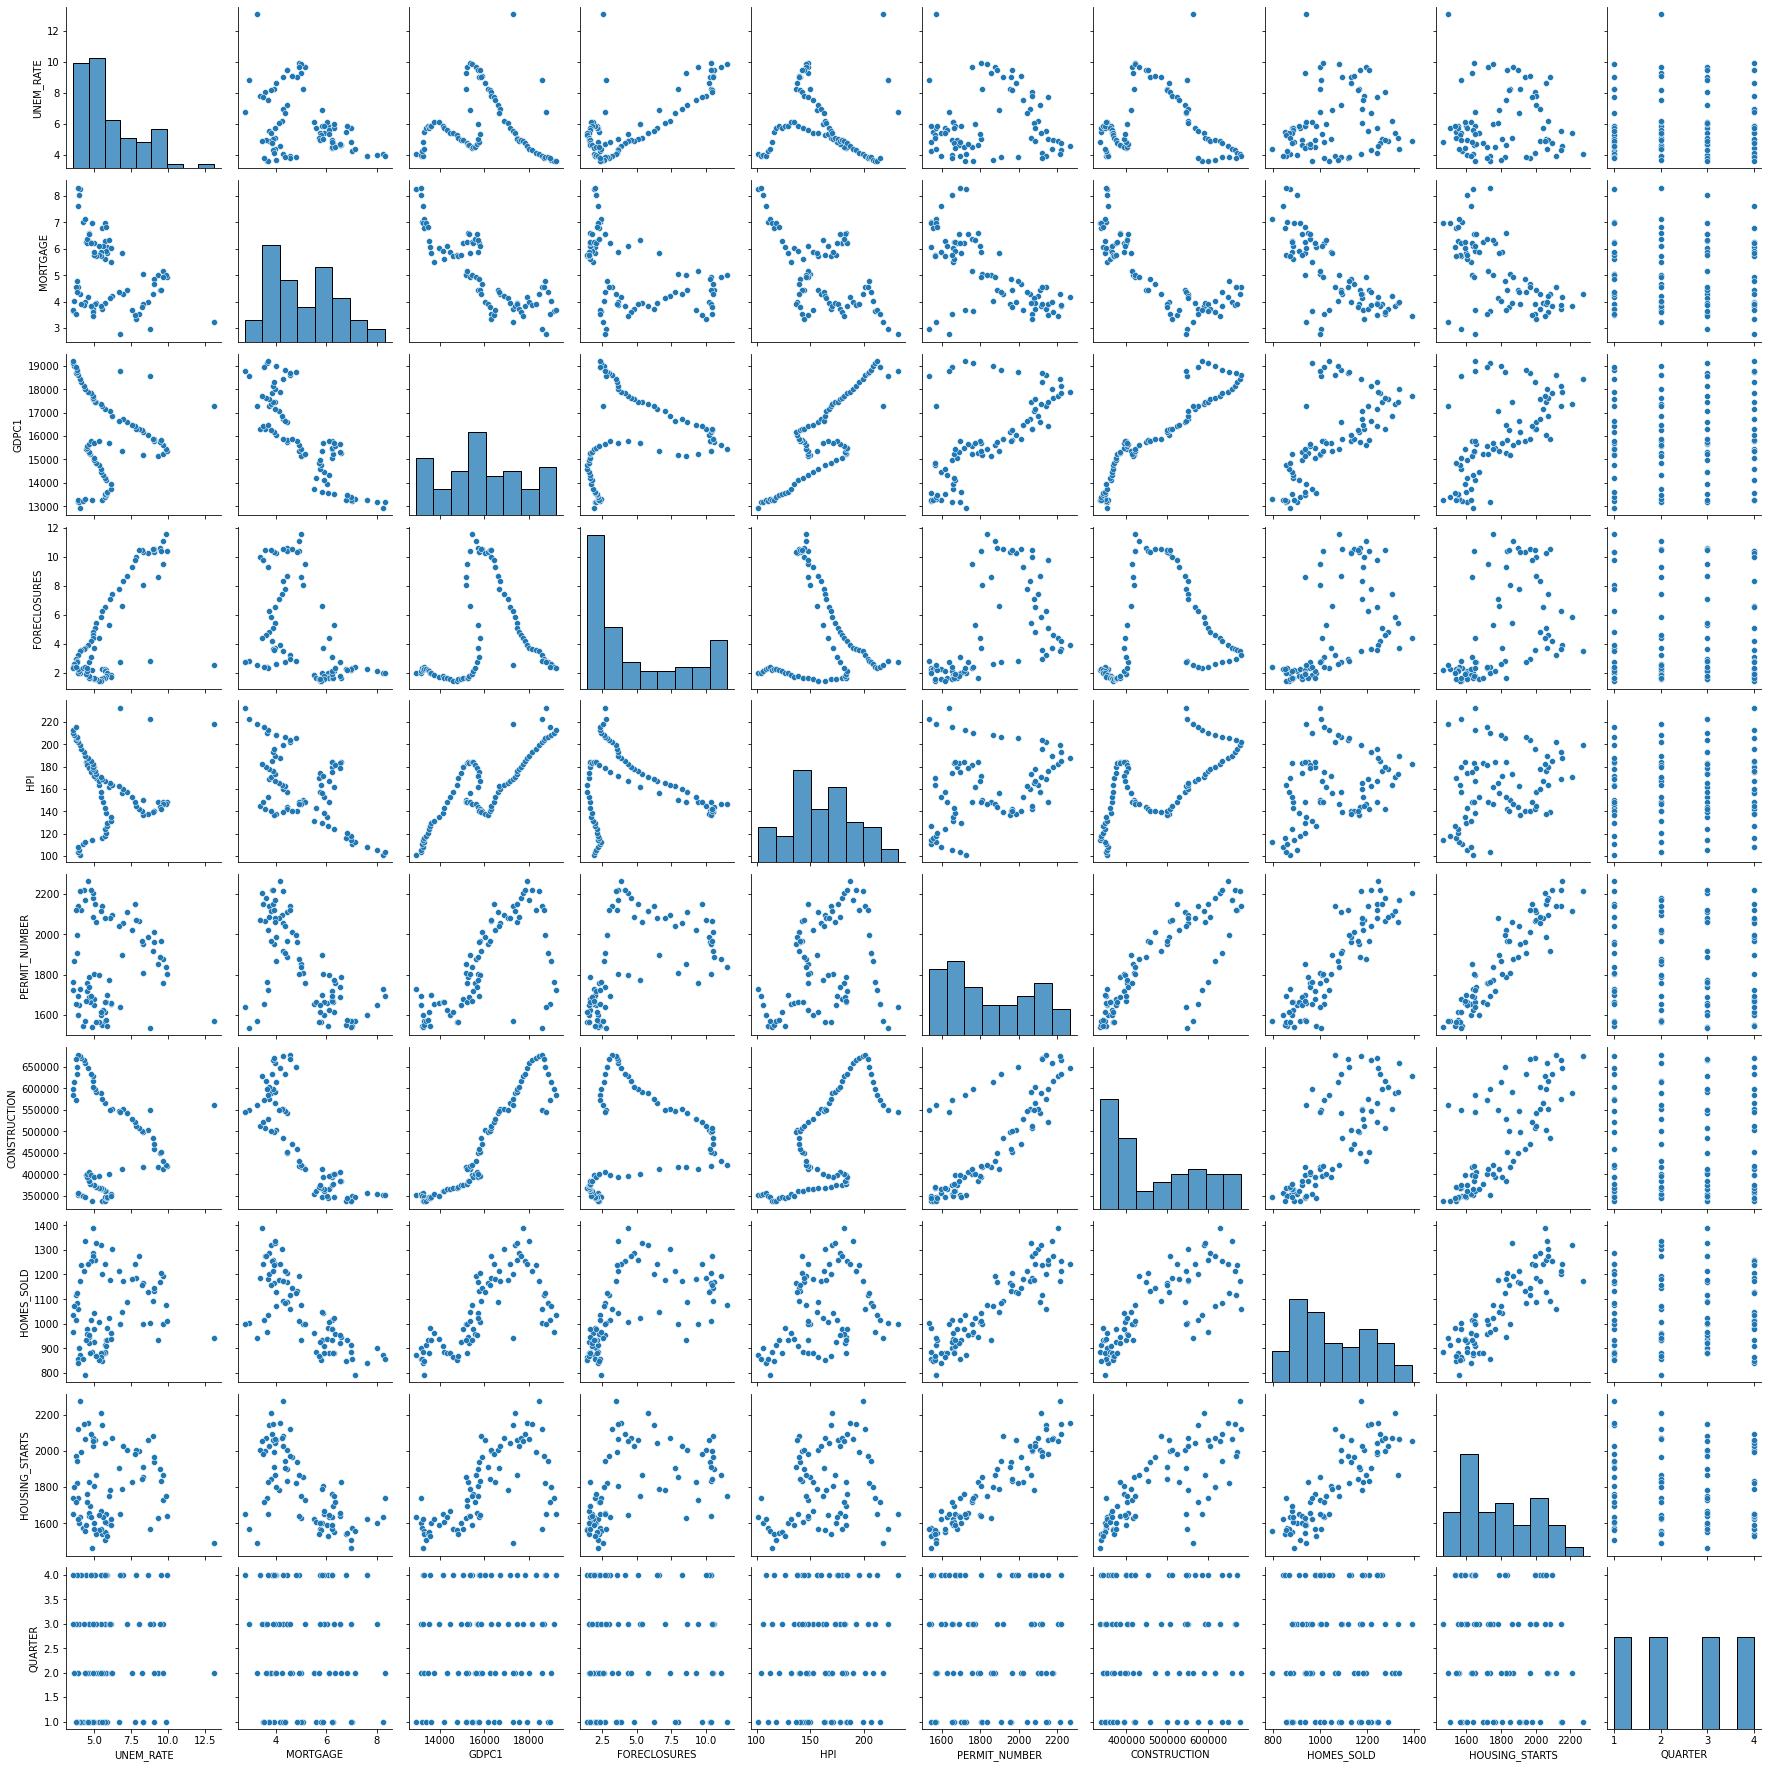

In [47]:
sns.pairplot(us_house_price)

<AxesSubplot:xlabel='QUARTER', ylabel='HPI'>

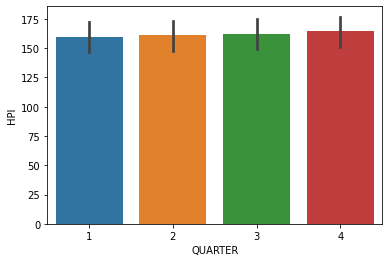

In [48]:
sns.barplot(x = 'QUARTER',y = 'HPI', data = us_house_price)

### Observation:-

1. From above plot, it is clear that in quarter 1,2,3,4 the value of HPI lies beteween 160 to 175.

<AxesSubplot:xlabel='QUARTER', ylabel='count'>

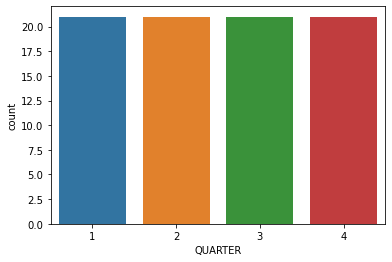

In [49]:
sns.countplot(x = 'QUARTER', data = us_house_price)

### Observation:-

1. From above plot, it is clear that quarter 1,2,3,4 has count more than 20.0.

<AxesSubplot:xlabel='QUARTER', ylabel='HOUSING_STARTS'>

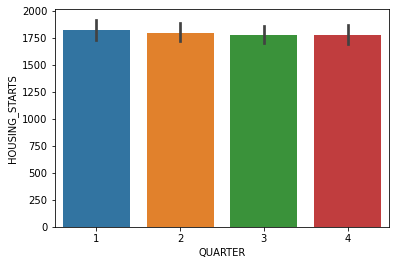

In [50]:
sns.barplot(x = 'QUARTER', y = 'HOUSING_STARTS',data = us_house_price)

### Observation:- 

1. From above plot , it is clear that there is slight flactuation among 1,2,3 and 4 QUARTER values against HOUSING_STARTS.
2. The value of HOUSING_STARTS is 1800 in QUARTER 1.
3. The value of HOUSING_STARTS is 1735 in QUARTER 2.
4. The value of HOUSING_STARTS IS 1752 in QUARTER 3.
5. The value of HOUSING_STARTS is 1754 in QUARTER 4.

<AxesSubplot:xlabel='QUARTER', ylabel='HOMES_SOLD'>

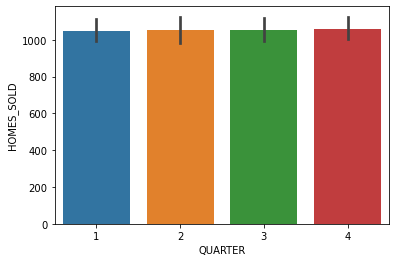

In [51]:
sns.barplot(x = 'QUARTER', y = 'HOMES_SOLD',data = us_house_price)

### Oservation:- 

1. From above plot, it is clear that there is very slight units of HOMES_SOLD in 1,2,3 amd 4 QUARTERS.
2. The value of HOMES_SOLD is 1010 units in QUARTER 1.
3. The value of HOMES_SOLD is 1012 units in QUARTER 2.
4. The value of HOMES_SOLD is 1012 units in QUARTER 3 and 1012 units HOMES_SOLD in QUARTER 4 too.

<AxesSubplot:xlabel='QUARTER', ylabel='PERMIT_NUMBER'>

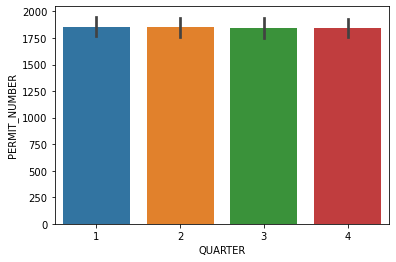

In [52]:
sns.barplot(x = 'QUARTER', y = 'PERMIT_NUMBER',data = us_house_price)

### Observation:- 

1. From above plot, it is clear that value of PERMIT_NUMBER issued in each QUARTER is slightly differ.
2. The value of PERMIT_NUMBER in QUARTER 1 is 1760.
3. The value of PERMIT_NUMBER in QUARTER 2 is 1755.
4. The value of PERMIT_NUMBER in QUARTER 3 is 1753.
5. The value of PERMIT_NUMBER in QUARTER 4 is also 1753.

<AxesSubplot:xlabel='QUARTER', ylabel='FORECLOSURES'>

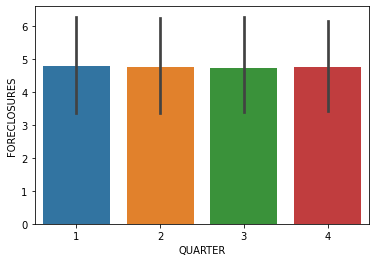

In [53]:
sns.barplot(x = 'QUARTER', y = 'FORECLOSURES',data = us_house_price)

### Observation:-

1. From above plot, it is clear that FORECLOSURES in all 1,2,3 ana 4 QUARTERS is around 4.5%.

<AxesSubplot:xlabel='QUARTER', ylabel='UNEM_RATE'>

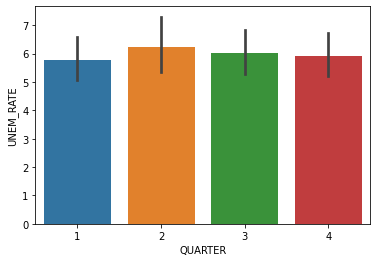

In [54]:
sns.barplot(x = 'QUARTER', y = 'UNEM_RATE',data = us_house_price)

### Observation:-

1. From above plot, it is clear that value of  UNEM_RATE more differ among all QUARTERS.
2. The value of UNEM_RATE is minimum, that is 5.8% in QUARTER 1.
3. The value of UNEM_RATE is maximum, that is 6.3% in QUARTER 2.

<AxesSubplot:xlabel='QUARTER', ylabel='CONSTRUCTION'>

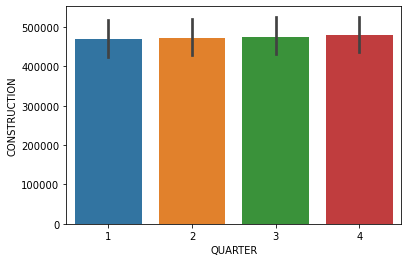

In [55]:
sns.barplot(x = 'QUARTER', y = 'CONSTRUCTION',data = us_house_price)

### Observation:-

1. From above plot , it is clear that the value of CONSTRUCTION is 450000 million dallors among all QUARTERS.

<AxesSubplot:xlabel='QUARTER', ylabel='MORTGAGE'>

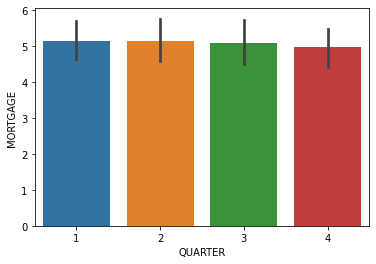

In [56]:
sns.barplot(x = 'QUARTER', y = 'MORTGAGE',data = us_house_price)

### Observation:- 

1. From above plot, it is clear that we have two QUARTERS have that is QUARTER 2 and QUARTER 4 followed as maximum and minimum MORTGAGE values.
2. The value of MORTGAGE in QUARTER 2 has maximum value , that is 5.2 % , but MORTGAGE value in QUARTER 4 has minimum value of 4.9 %.

<AxesSubplot:xlabel='QUARTER', ylabel='GDPC1'>

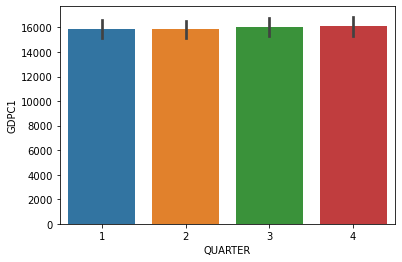

In [57]:
sns.barplot(x = 'QUARTER', y = 'GDPC1',data = us_house_price)

### Observation:- 

1. From above plot, it is clear that value of GDPC1 is slightly differ among all QUARTERS.
2. The value of GDPC1 in QUARTER 3 and 4 is around 16002 billion dallors.
3. The value of GDPC1 in QUARTER 1 AND 2 is around 15999 billion dallors.

#### Derived Feature

From this dataset i have derive QUARTER feature from DATE feature, so we will say QUARTER is Derived Feature. Then i have dropped DATE FEATURE from dataset.

#### QUARTER - The 3 months duration- Here in our data set it is Orderdinal feature. Here i have divided QUARTER in 4 parts. 

# Conclusion:-

### 1. From EDA , i got understand that there are some features that is influncing HPI.

### 2. QUARTER, CONSTRUCTION, PERMIT_NUMBER, HOMES_SOLD, HOUSING_STARTS, and GDPC1 features that are influncing HPI from data analysis.

### 3. CONSTRUCTION, PERMIT_NUMBER, HOMES_SOLD, HOUSING_SOLD, and GDPC1 is Cardinal feature in the dataset.

###  4. QUARTER is Ordernial feature in the dataset which i have derived from DATE feature.

# Thank You!